In [1]:
import matplotlib.pyplot as plt
import pandas as pd

strengthOfSchedule = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/sos/1999.csv', index_col=0)
strengthOfSchedule.index = strengthOfSchedule.index.rename('Team')
#print(strengthOfSchedule.head())

weeklyStats = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/weekly/2019/week1.csv')
#print(weeklyStats.head())

yearlyStats = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/yearly/2019.csv')
#print(yearlyStats.head())

In [2]:
weekYearDf = pd.DataFrame()
tempYearDf = pd.DataFrame()
for years in range(1999, 2020):
    for weeks in range(1, 16):
        readFile = ("https://raw.githubusercontent.com/fantasydatapros/data/master/weekly/" + str(years) + "/week" + str(weeks) + ".csv")
        weeklyDf = pd.read_csv(readFile)
        weeklyDf.drop(['Int', 'PassingAtt', 'Cmp', 'RushingAtt', 'PassingTD',
                          'RushingTD', 'Rec', 'Tgt', 'ReceivingTD', 'FL',
                          'PPRFantasyPoints', 'HalfPPRFantasyPoints'], axis = 1, inplace=True)

        weeklyDf['Week'] = weeks
        tempYearDf = pd.concat([tempYearDf,weeklyDf])
        
    tempYearDf['Year'] = years
    weekYearDf = pd.concat([weekYearDf,tempYearDf])

#print(weekYearDf.tail())

QB_weekYearDf = weekYearDf.loc[weekYearDf['Pos'] == 'QB']
#print(weekYearDf['Year'])

RB_weekYearDf = weekYearDf.loc[weekYearDf['Pos'] == 'RB']
#print(RB_weekYearDf.head())

WR_weekYearDf = weekYearDf.loc[weekYearDf['Pos'] == 'WR']
#print(WR_weekYearDf.head())

Text(0, 0.5, 'Annual Fantasy Points')

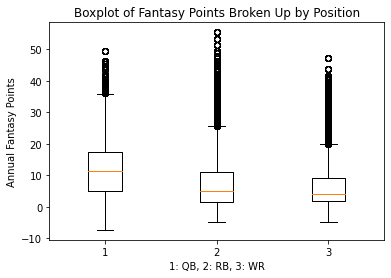

In [3]:
plt.boxplot([QB_weekYearDf['StandardFantasyPoints'],RB_weekYearDf['StandardFantasyPoints'], WR_weekYearDf['StandardFantasyPoints']])
plt.title('Boxplot of Fantasy Points Broken Up by Position')
plt.xlabel('1: QB, 2: RB, 3: WR')
plt.ylabel('Annual Fantasy Points')

Text(0, 0.5, 'Annual Yards')

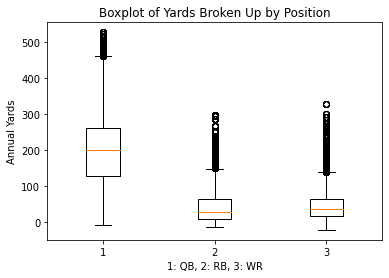

In [4]:
plt.boxplot([QB_weekYearDf['PassingYds'],RB_weekYearDf['RushingYds'], WR_weekYearDf['ReceivingYds']])
plt.title('Boxplot of Yards Broken Up by Position')
plt.xlabel('1: QB, 2: RB, 3: WR')
plt.ylabel('Annual Yards')

Text(0, 0.5, 'Number of Players in Each Bucket')

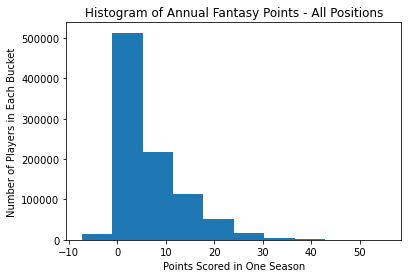

In [5]:
plt.hist(weekYearDf['StandardFantasyPoints'])
plt.title('Histogram of Annual Fantasy Points - All Positions')
plt.xlabel('Points Scored in One Season')
plt.ylabel('Number of Players in Each Bucket')

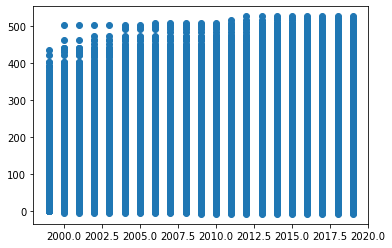

In [6]:
plt.scatter(QB_weekYearDf['Year'], QB_weekYearDf['PassingYds'])
plt.show()
